Project Members:                                                  
- Daniel Arday
- Albert Chen

Date:


# Introduction

The UCI Bank Marketing dataset (https://archive.ics.uci.edu/dataset/222/bank+marketing) is a collection of anonymized marketing data based phone calls initiated from a Portuguese banking institution. Multiple contacts to the same client was often required to access if a client would subscribe to a bank term deposit (Sérgio Moro, P. Cortez, P. Rita. 2014).


### Objective

**Our classification goal with this dataset is to predict if banking clients will subscribe to a term deposit.**

### Data Description/Attribuite Information
   1. `age`: age demographic
   2. `job`: employment type
   3. `martial`: martial status
   4. `education`: categorical education status
   5. `default`: credit default
   6. `balance`: average yearly balance
   7. `housing`: housing loan status
   8. `loan`: personal loan status
   9. `contact`: contact communication type
   10. `day`: last contact day of the week
   11. `month`: last contact month
   12. `duration`: last contact duration in seconds
   13. `campaign`: number of repeated contacts with client
   14. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (-1 not previously contacted)
   15. `previous`: 	number of contacts performed before this campaign and for this client
   16. `poutcome`: outcome of the previous marketing campaign
   17. `y`: is client subscribed to term deposit

### Loading libraries and data

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/bank.csv', sep=';')
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Data Preparation

In [3]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
#Let's make a copy of the data
df = data.copy()

In [5]:
# Are there any duplicate rows in the data. - Nope!
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Exploratory Data Analysis

In [7]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    
### Function to plot boxplot
def boxplot(x):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=data, x="ProdTaken",y=data[x],palette="rocket")
    plt.show()
    
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    #print(tab1)
    #print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index")#.sort_values(
        #by=sorter, ascending=False
    #)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Univariate/Plot Analysis

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Observations on Term Deposit Subscription

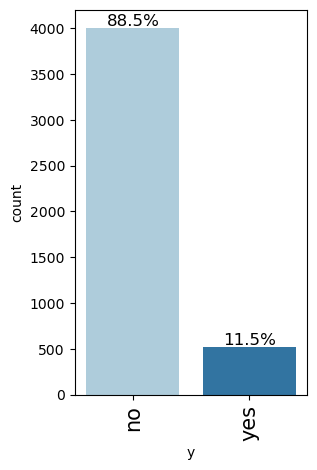

In [9]:
#y = yes they are subscribed
labeled_barplot(df,"y",perc=True)

### Observations on Age


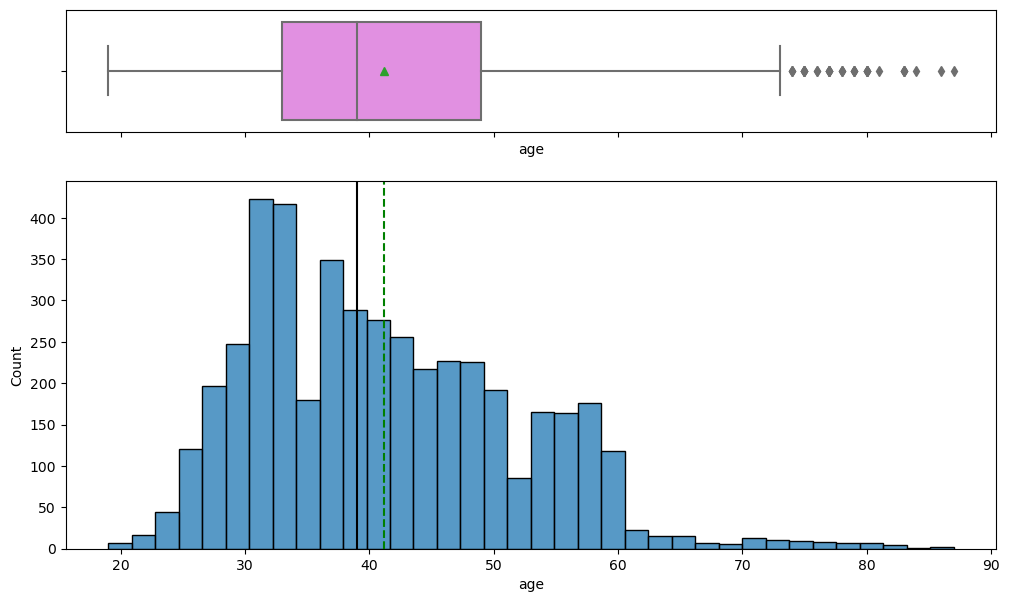

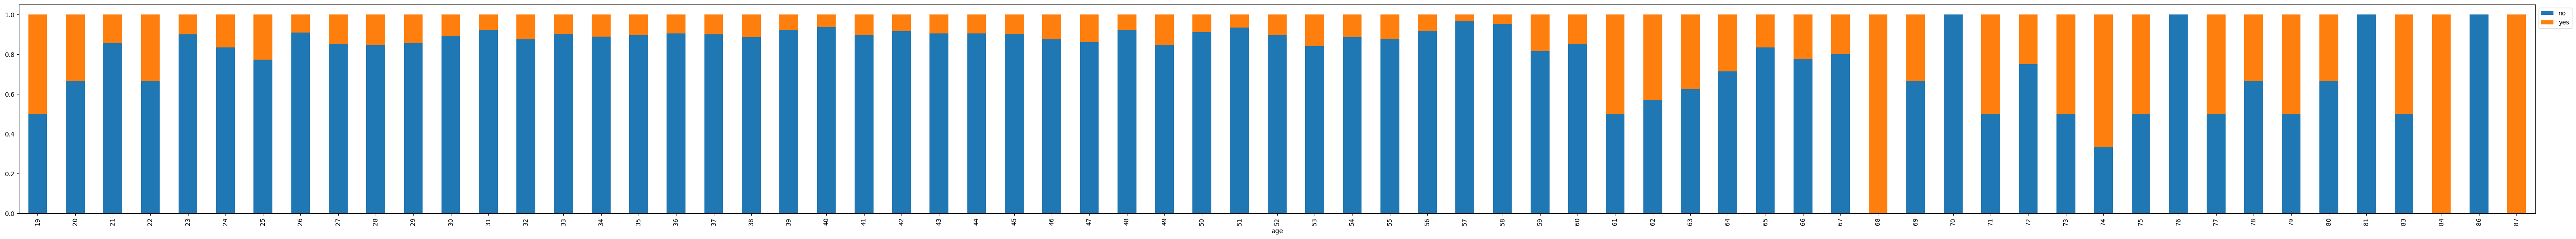

In [10]:
#Age
cat = "age"
histogram_boxplot(df, cat)
stacked_barplot(df, cat, "y")

`Age` ranges from 18 to 95 years is normaly distributed but somewhat skewed to the right. We can see that older customers are more likely to have a subscription to a term deposit.

### Observations on Job

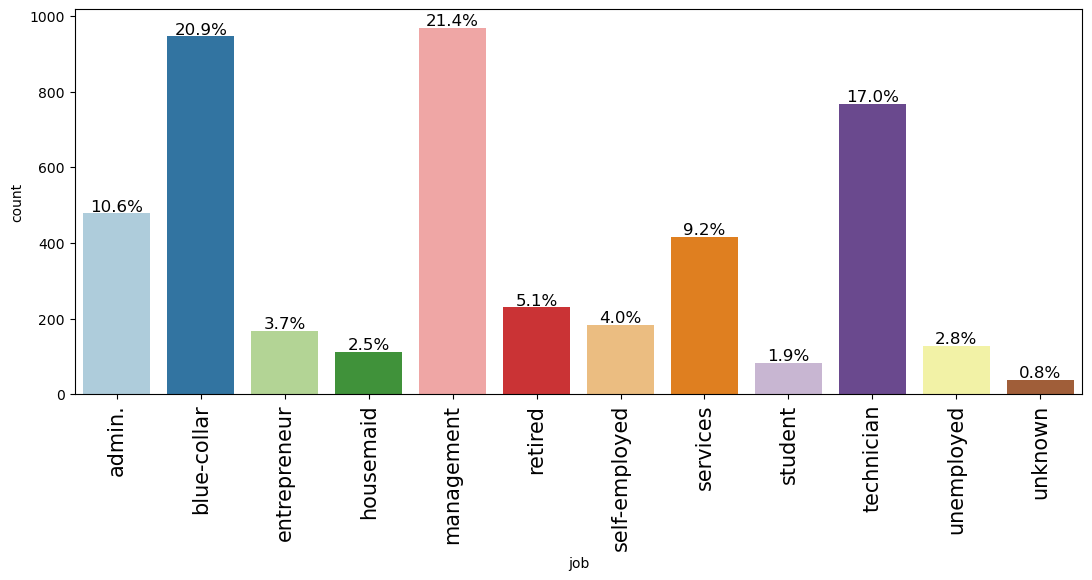

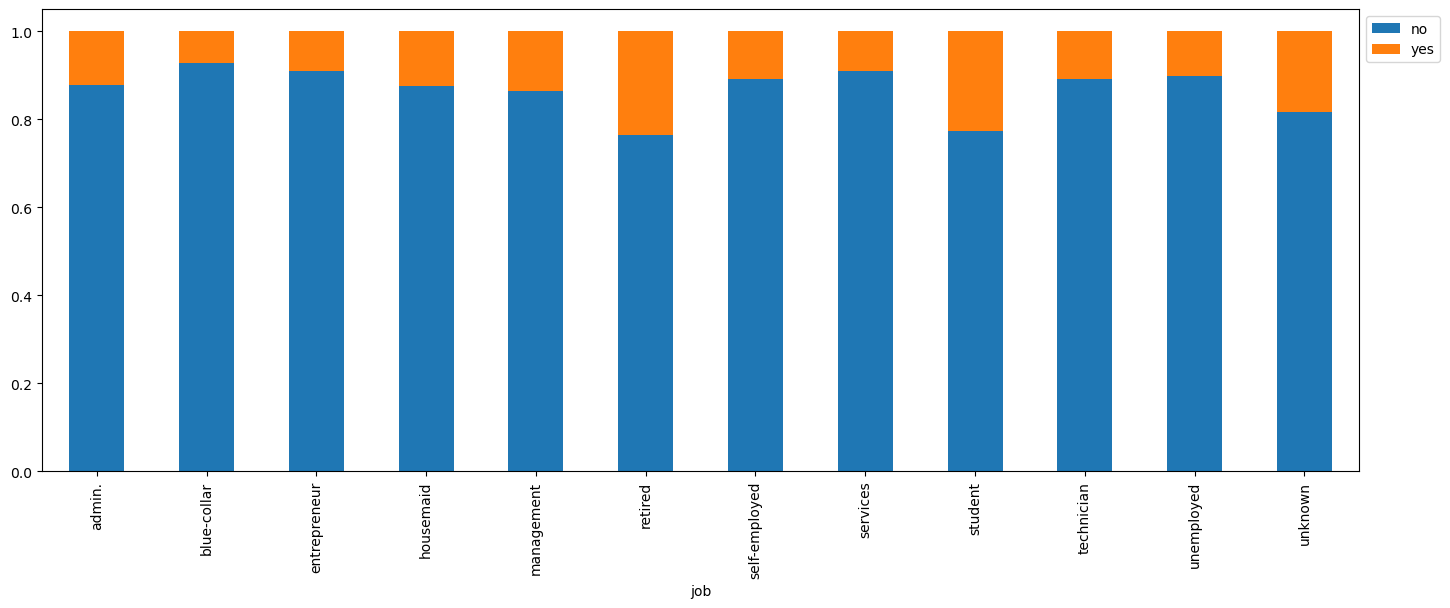

In [11]:
cat = "job"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Marital Status

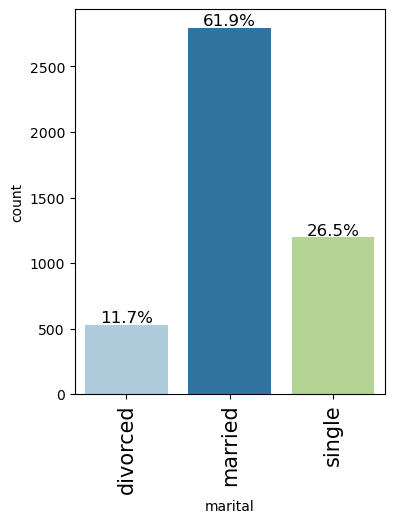

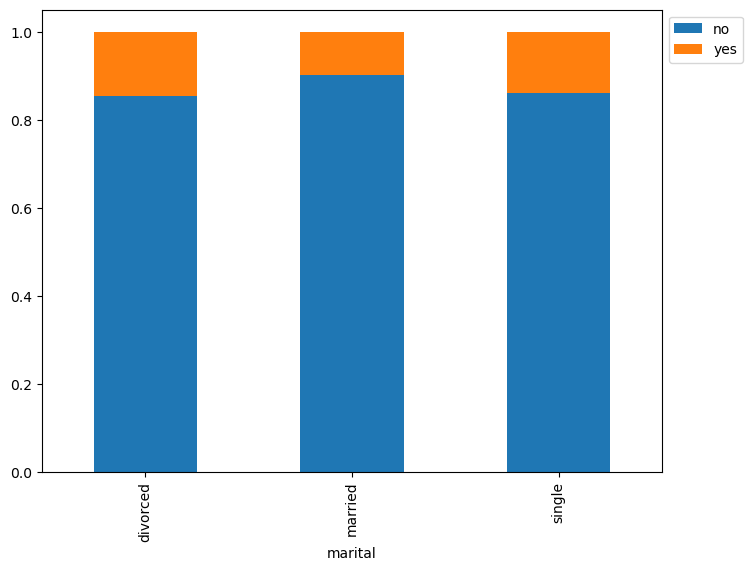

In [12]:
cat = "marital"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Education

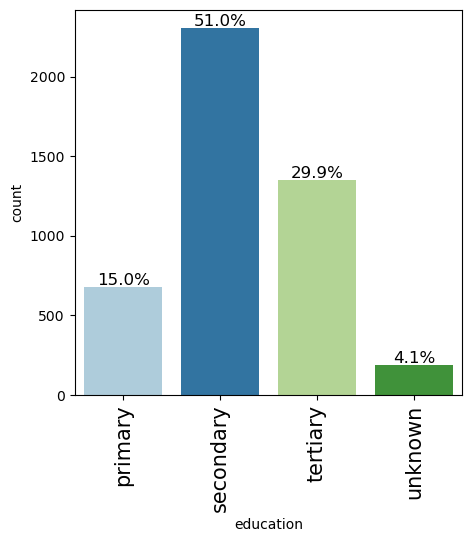

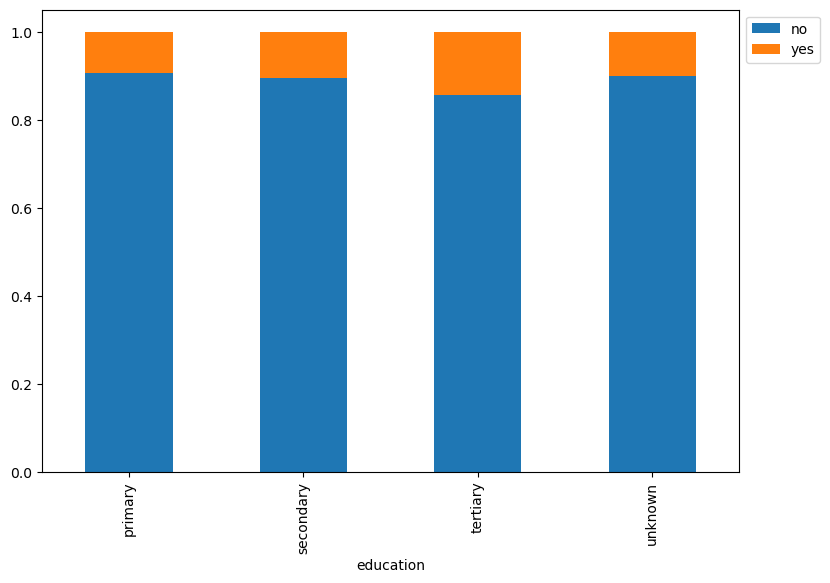

In [13]:
cat = "education"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Default

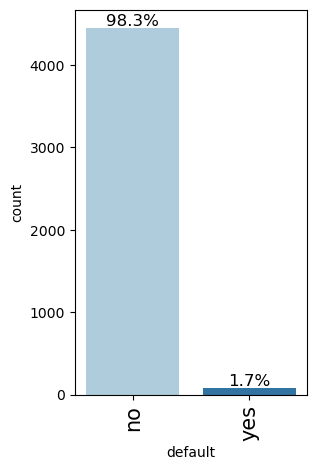

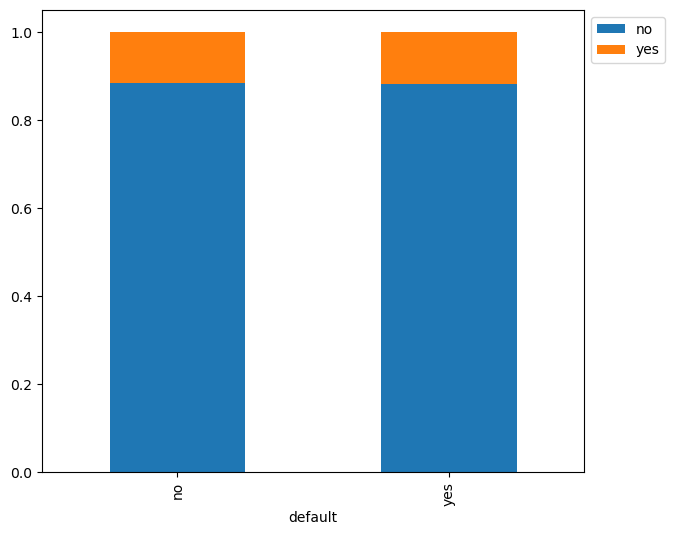

In [14]:
cat = "default"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Balance

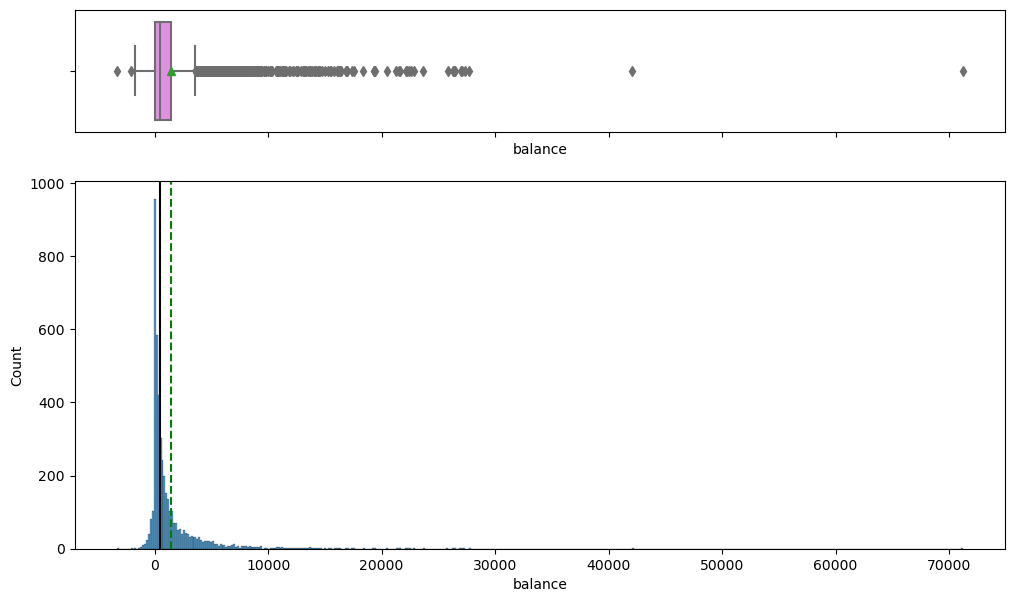

In [15]:
cat = "balance"
histogram_boxplot(df, cat)
# stacked_barplot(df, cat, "y") - Some people have ridiculously high balances

`Balance`

### Observations on Housing

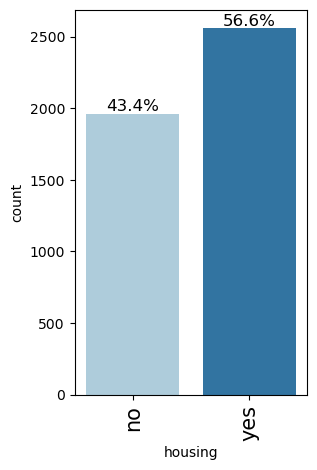

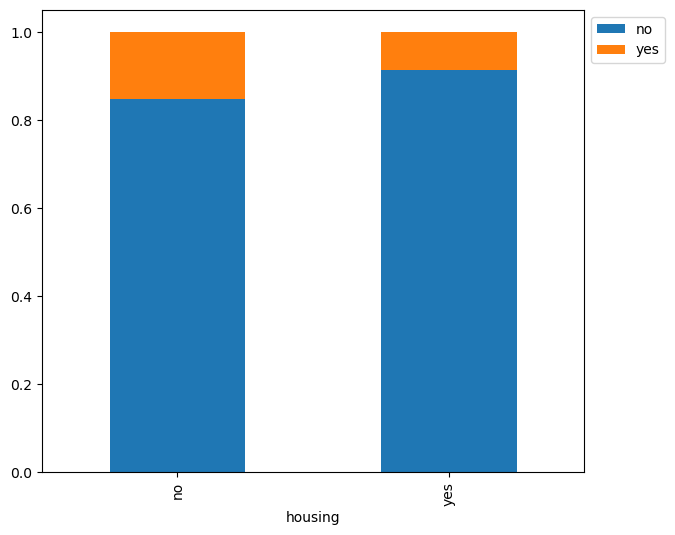

In [16]:
cat = "housing"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`housing`

### Observations on Loan

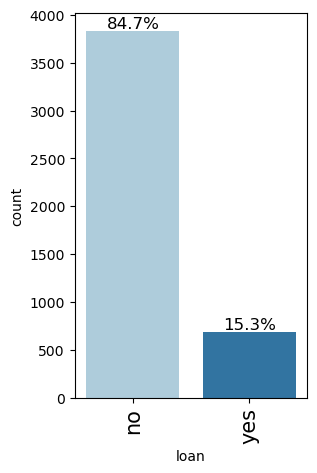

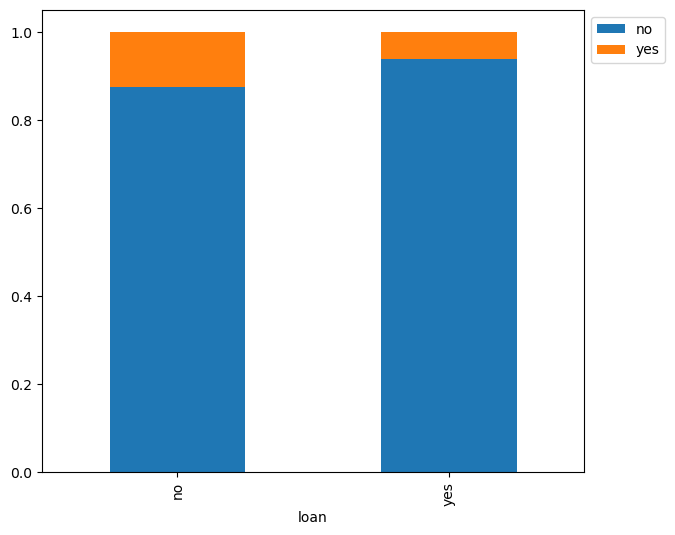

In [17]:
cat = "loan"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`loan`

### Observations on Contact

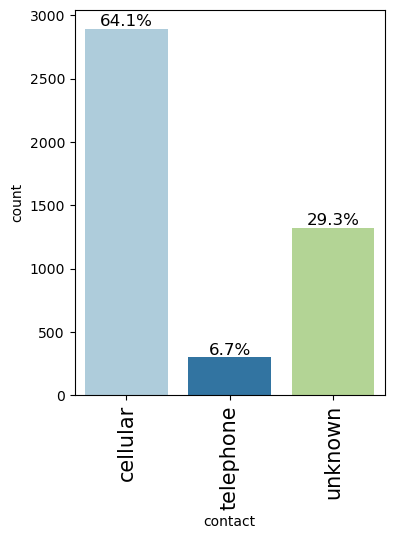

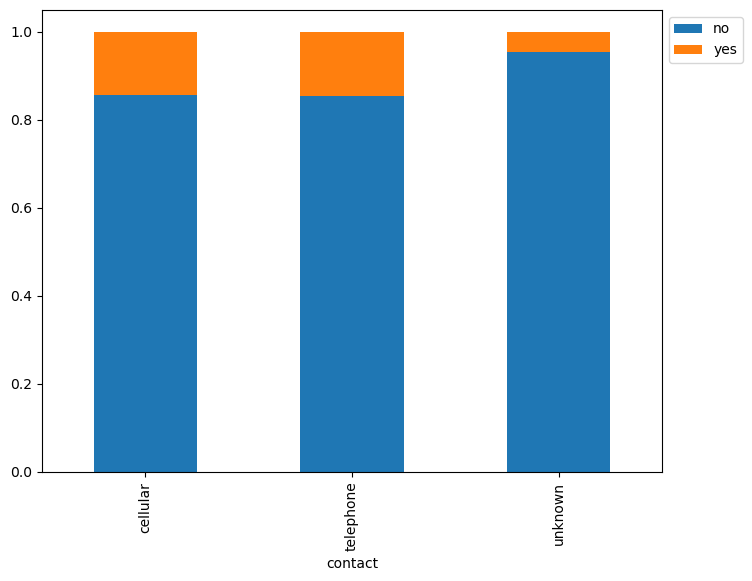

In [18]:
cat = "contact"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`contact`

### Observations on Day

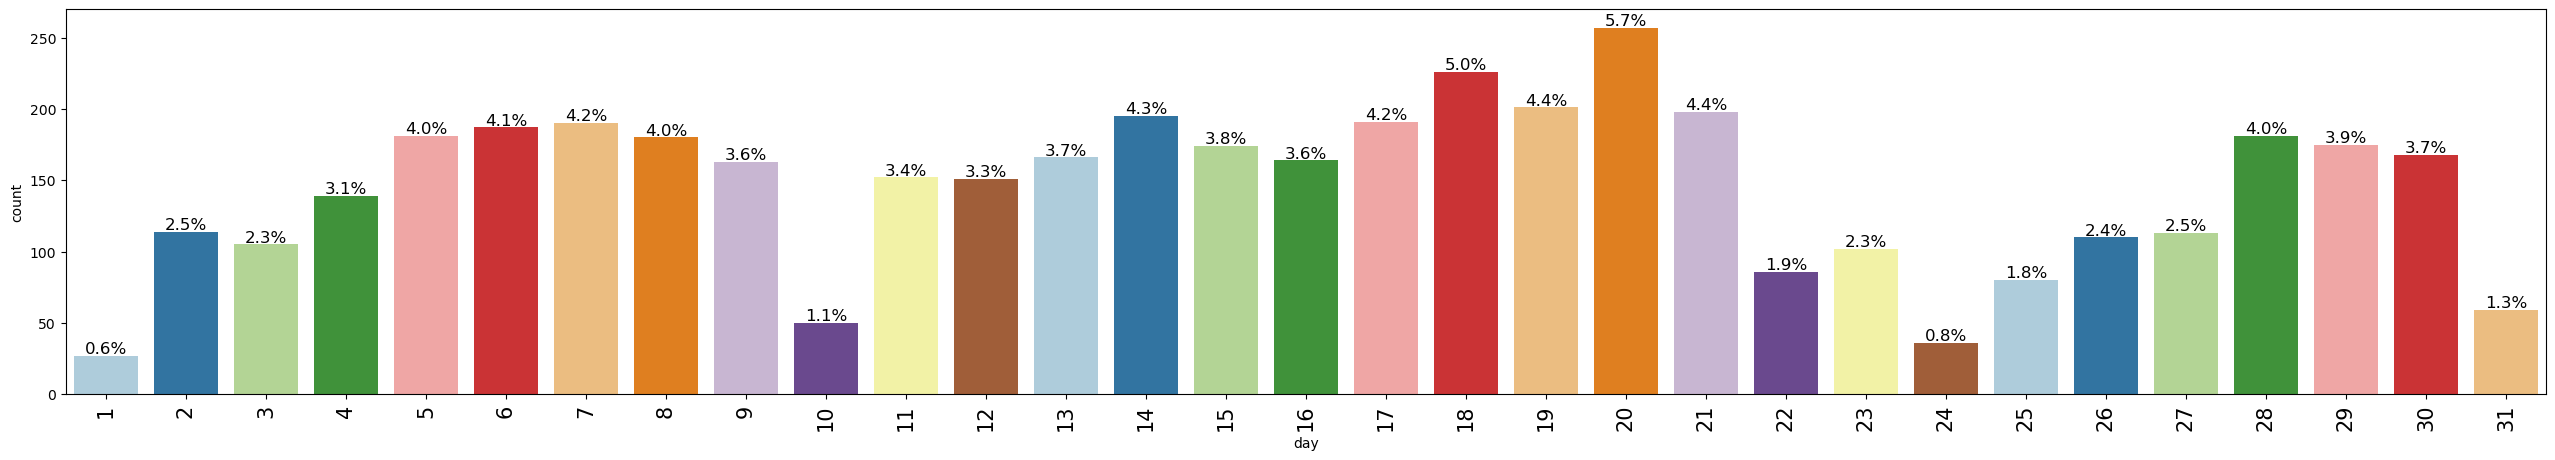

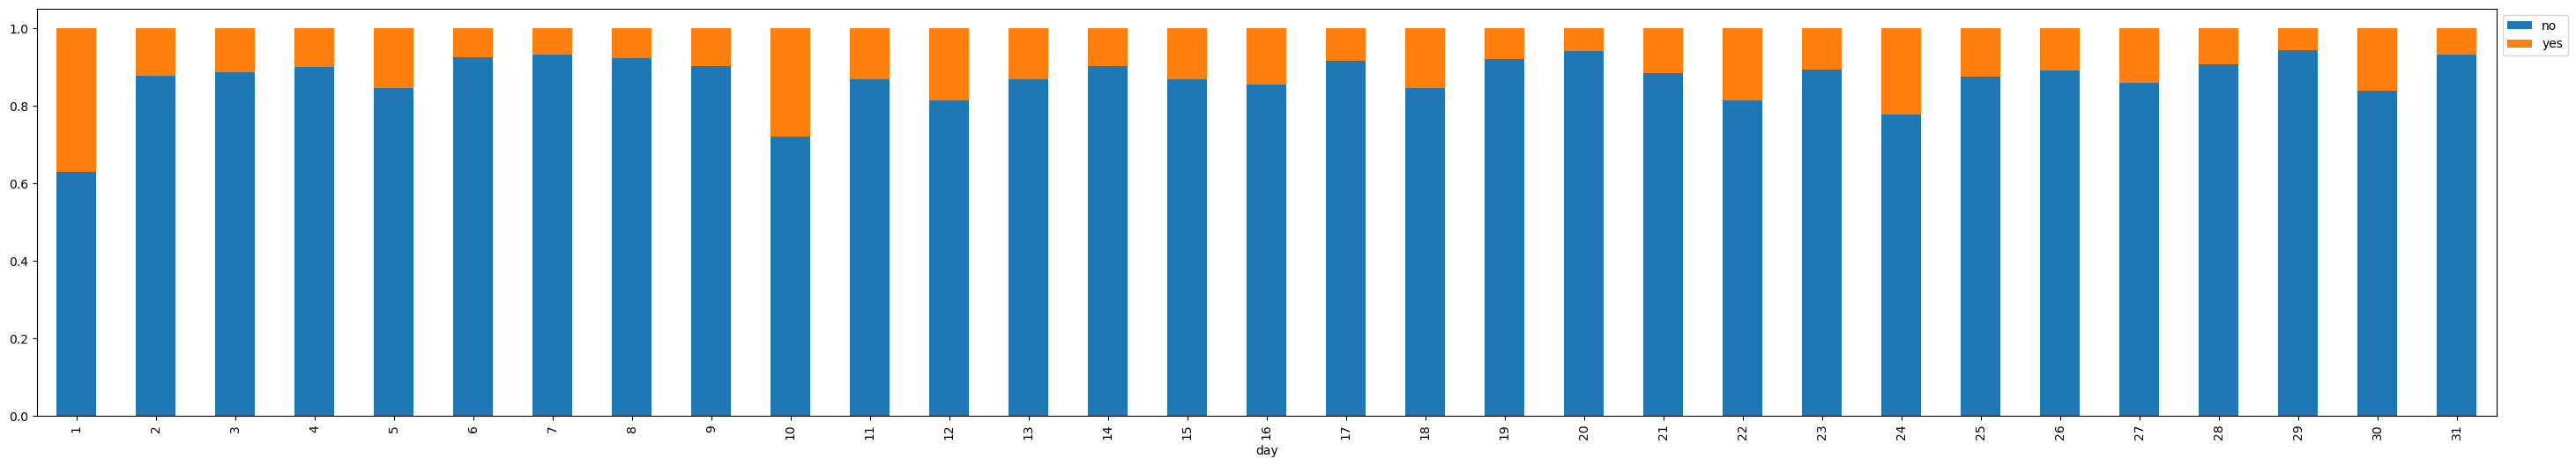

In [19]:
cat = "day"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`day`

### Observations on Month

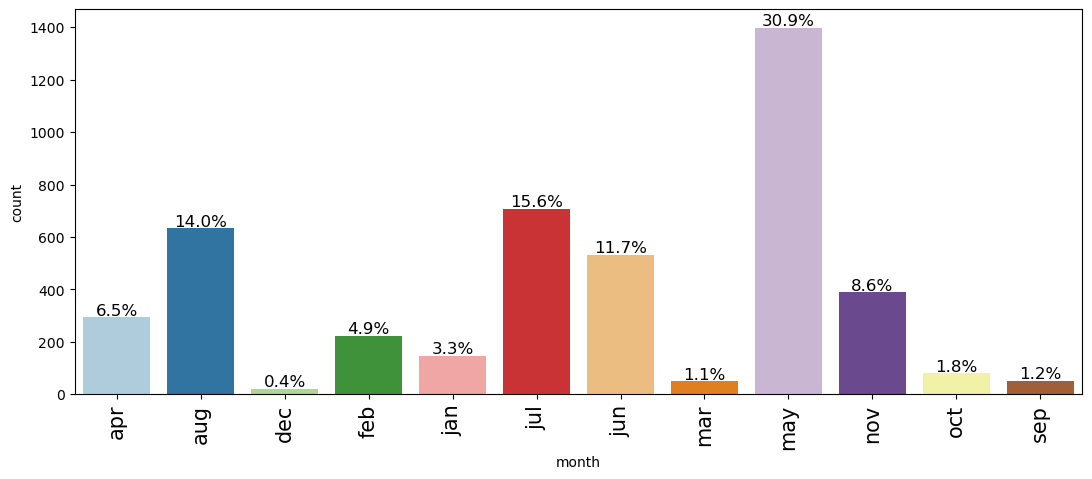

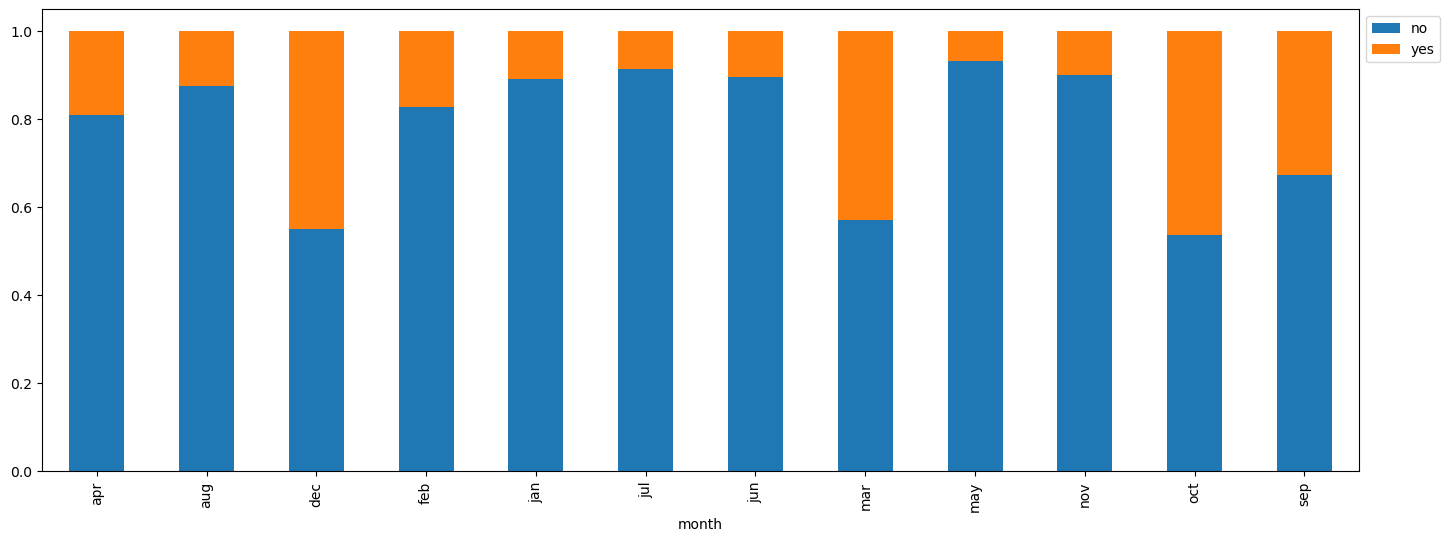

In [20]:
cat = "month"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`month`

### Observations on Duration

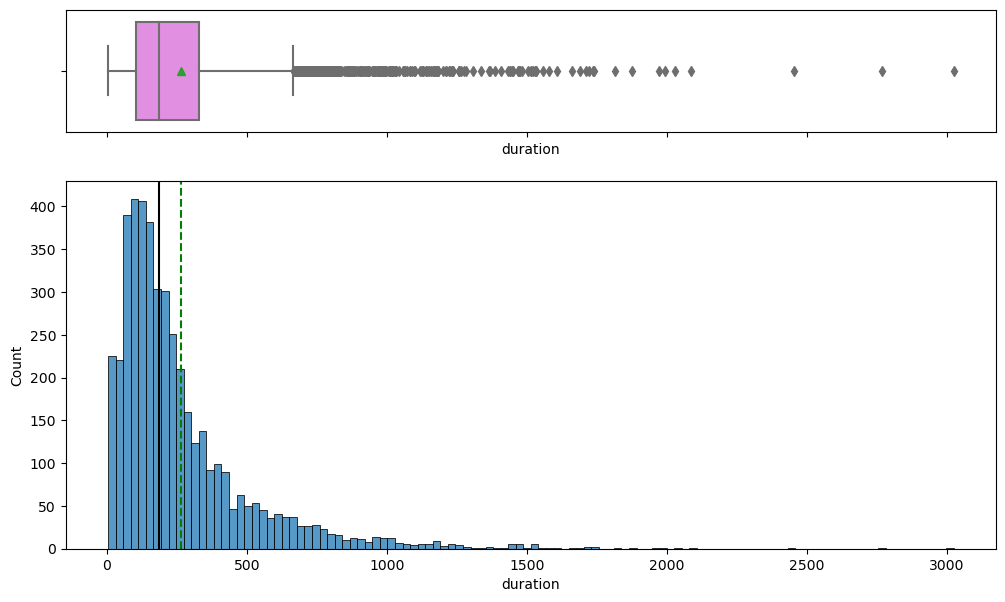

In [21]:
cat = "duration"
histogram_boxplot(df, cat)
# stacked_barplot(df, cat, "y") - so maybe convert this to minutes to be able to see all

`duration`

### Observations on Campaign

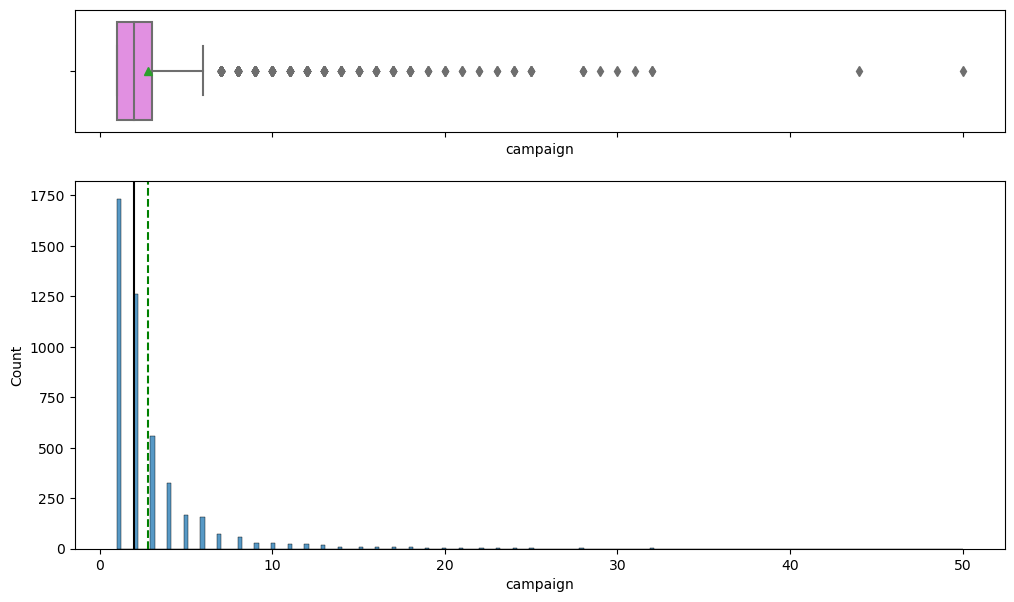

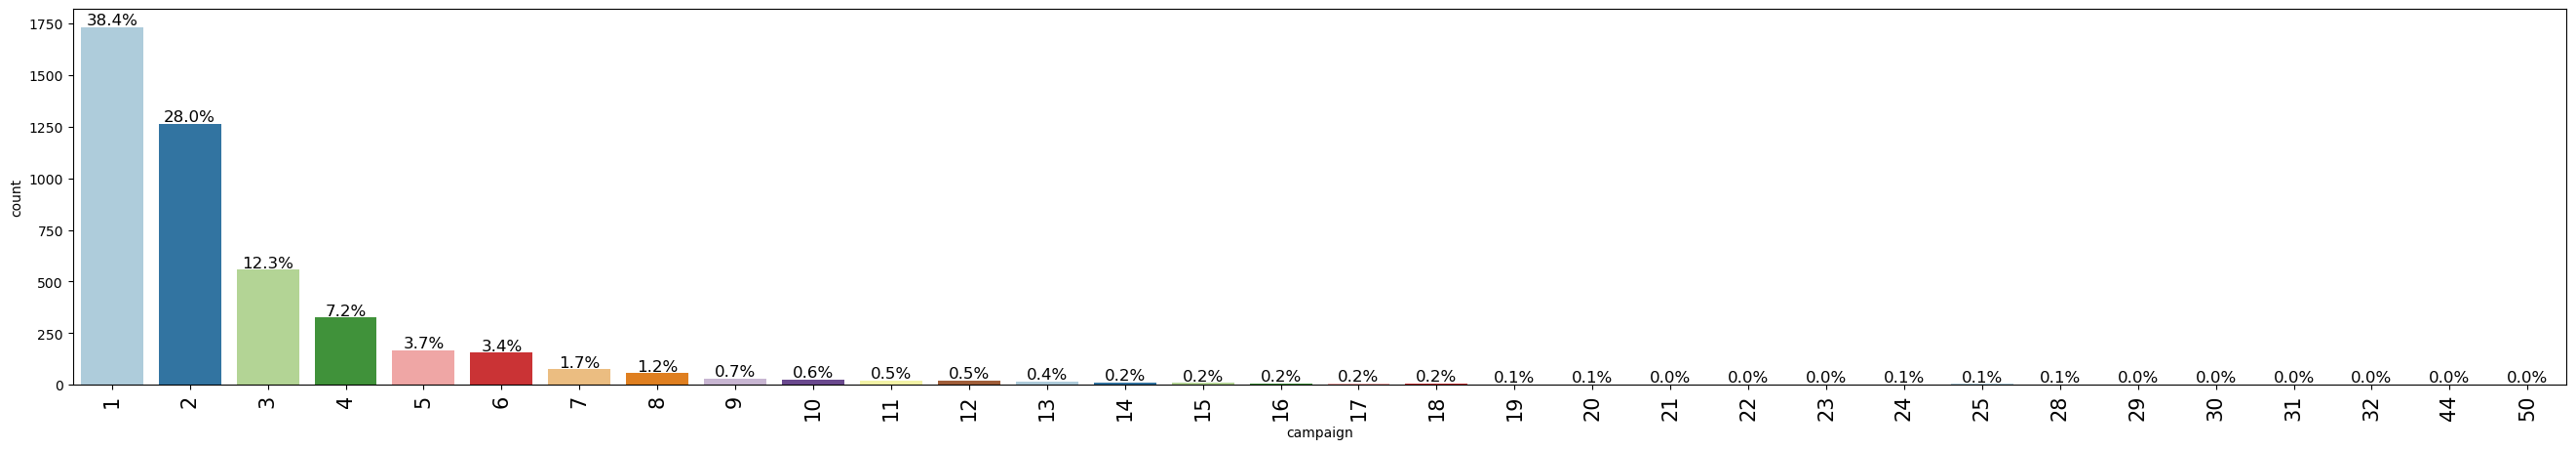

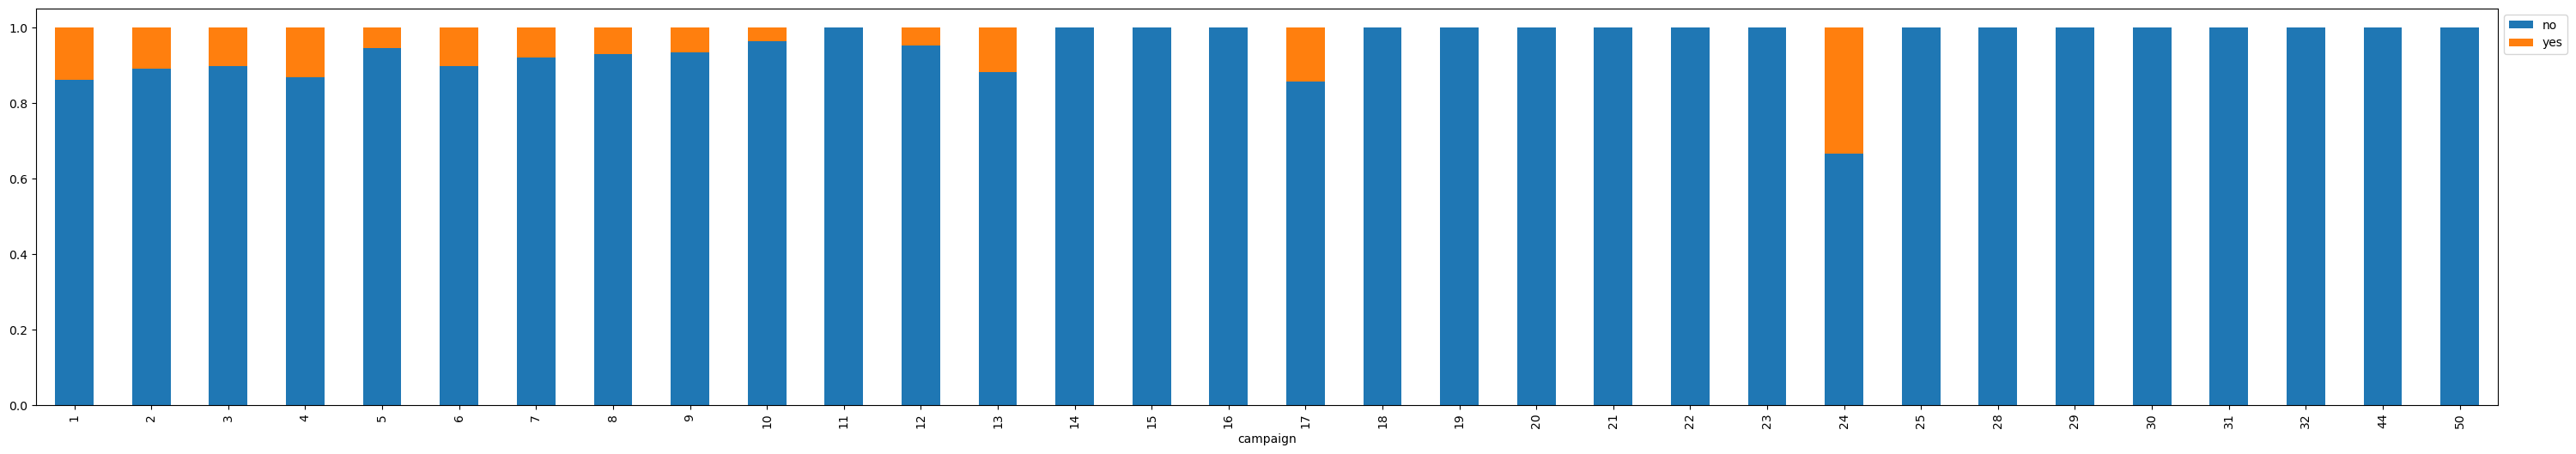

In [22]:
cat = "campaign"
histogram_boxplot(df, cat)
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`campaign`

### Observations on P Days 
(Number days elapsed from a previous a campaign contact)

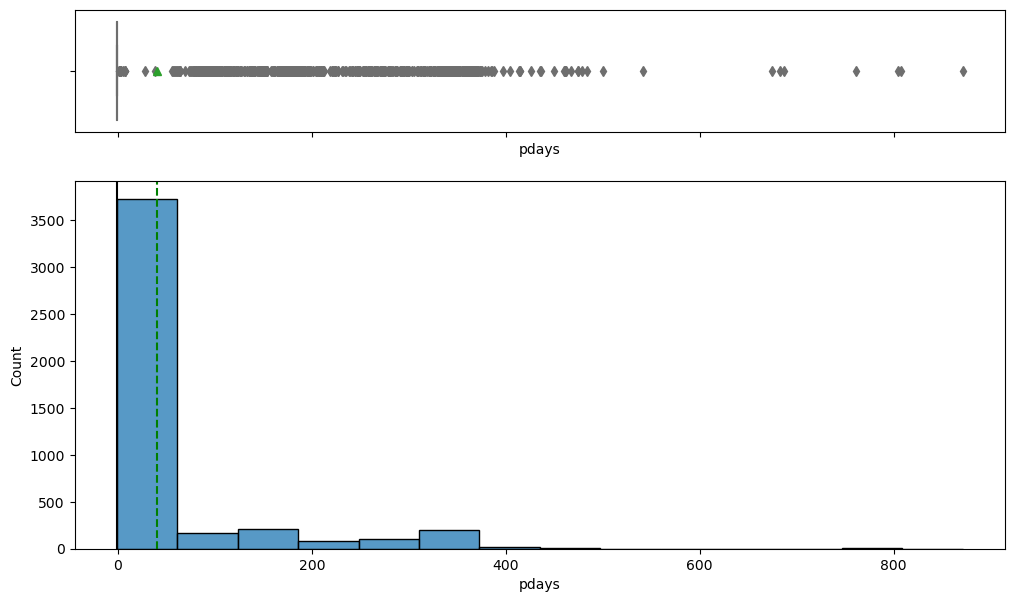

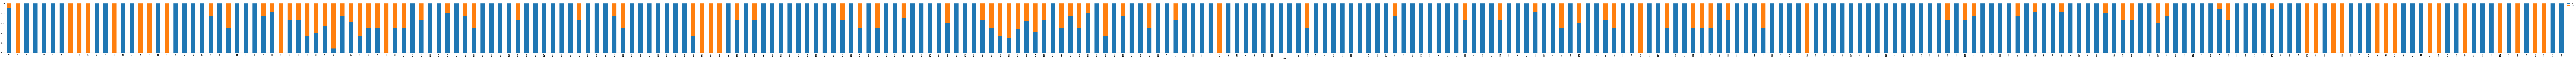

In [23]:
cat = "pdays"
histogram_boxplot(df, cat)
# labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`pdays` need to account for negative ones in this case

### Observations on Previous
Number of concacts before this campaign started

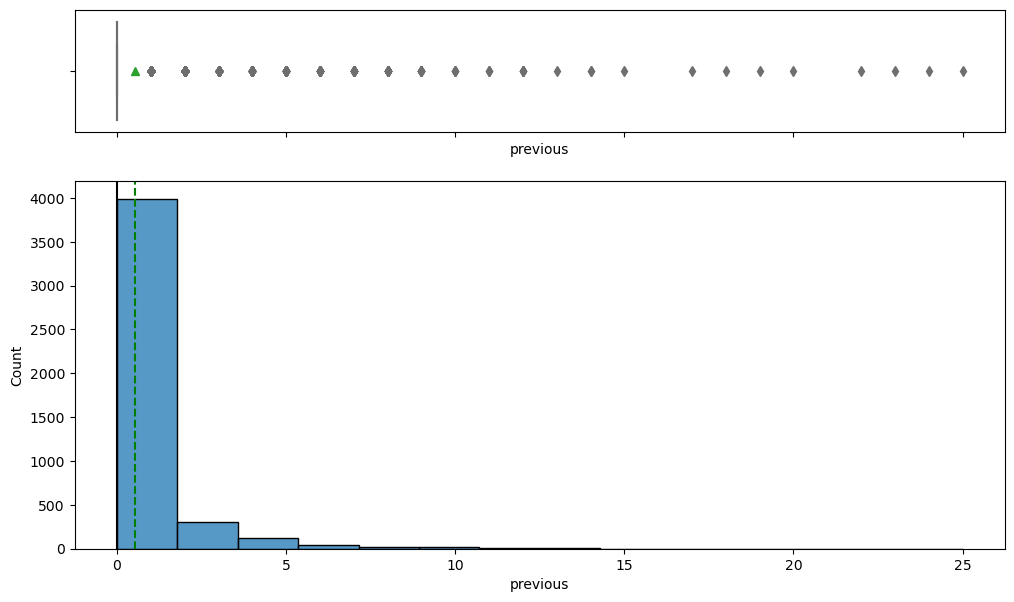

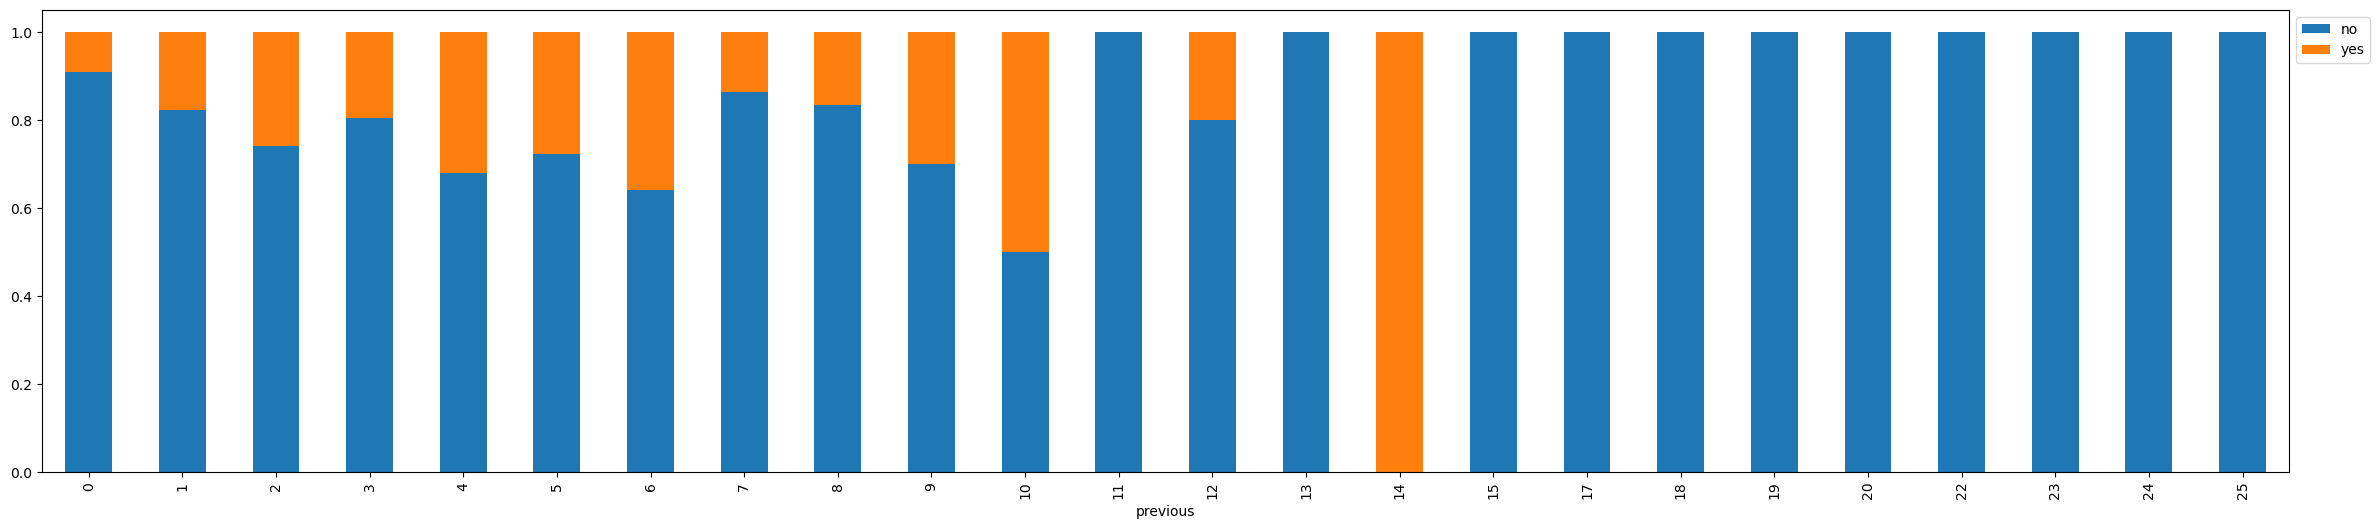

In [24]:
cat = "previous"
histogram_boxplot(df, cat)
# labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`previous` - drop 275

### Observations on PoutCome
The outcome of the previous marketing campaign

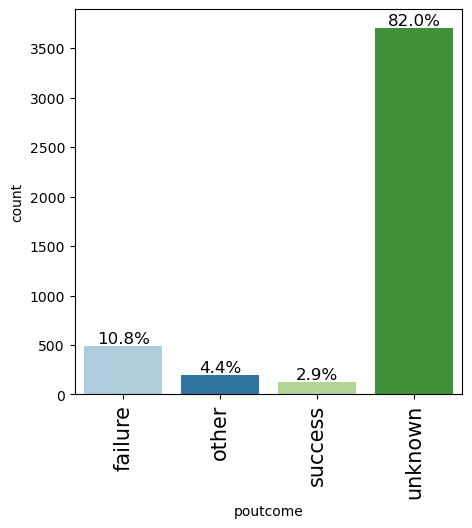

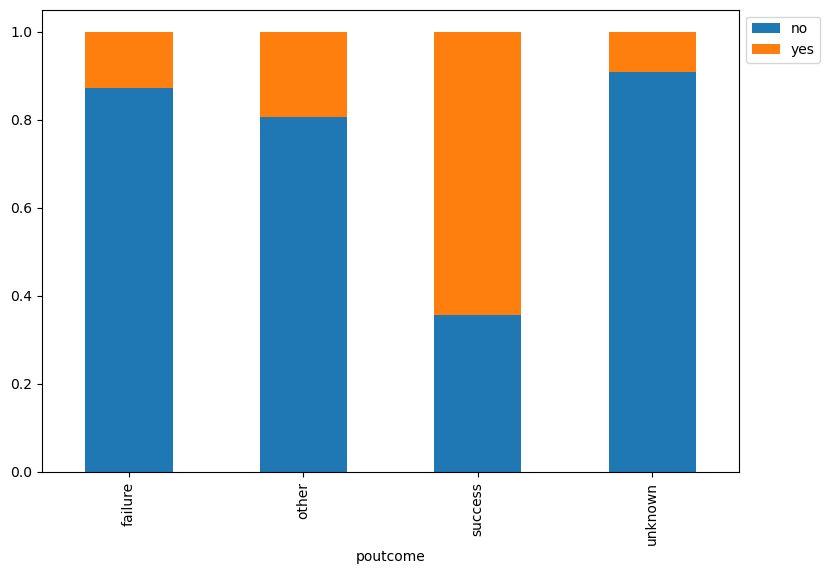

In [25]:
cat = "poutcome"
# histogram_boxplot(df, cat)
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`poutcome` - if they were successfully convinced by the previous marketing campaign they were very likely convinced by this one as well.

### Multivariate Analysis

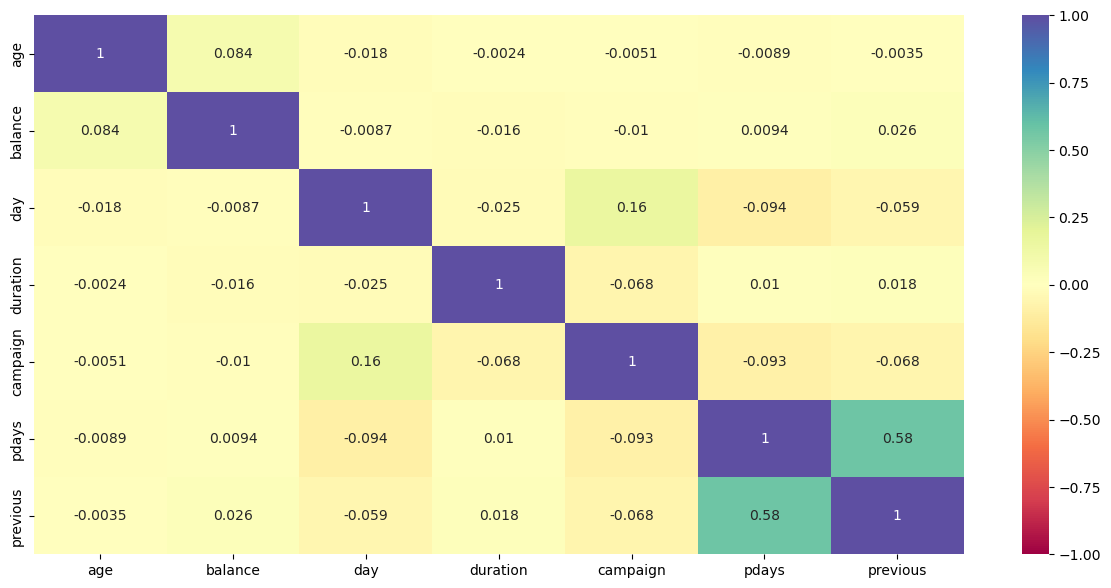

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

### Conclusions on EDA

Some thots

# Data-Prep

In [27]:
# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

### Split the Data

In [28]:
X = df.drop(['y'], axis=1)
y = df['y']

# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print("Training:", X_train.shape[0], "  Validation:", X_val.shape[0] , "  Test:", X_test.shape[0])

Training: 2712   Validation: 904   Test: 905


### One Hot Encoding

#### Let's see if the following categorical columns can be easily encoded and if there are any values that need to be imputed.

In [29]:
enc_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [30]:
for i in enc_cols:
    print(i, ":", data[i].unique())

job : ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital : ['married' 'single' 'divorced']
education : ['primary' 'secondary' 'tertiary' 'unknown']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'unknown' 'telephone']
month : ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome : ['unknown' 'failure' 'other' 'success']


#### One hot encoding excluding y.

In [50]:
enc_data = pd.get_dummies(data)
X_data = enc_data.drop(columns=['y_no', 'y_yes'])
X_data.head(5)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


#### Adding y variable for our classifiers.

In [55]:
y_data = enc_data[['y_no', 'y_yes']]
y_data.head(5)

,y_no,y_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Looks like all the data is well formatted and there is no need imputation

In [31]:
# df_enc = pd.get_dummies(data, enc_cols)
# df_enc.head(5)

In [32]:
# df_enc.columns

In [33]:
X_train = pd.get_dummies(data=X_train, columns=enc_cols, drop_first=True)
X_val = pd.get_dummies(data=X_val, columns=enc_cols, drop_first=True)
X_test = pd.get_dummies(data=X_test, columns=enc_cols, drop_first=True)
y_train = pd.get_dummies(data=y_train, columns=enc_cols, drop_first=True)
y_val = pd.get_dummies(data=y_val, columns=enc_cols, drop_first=True)
y_test = pd.get_dummies(data=y_test, columns=enc_cols, drop_first=True)

We are doing this because using drop_first=True in pd.get_dummies is a good practice to avoid multicollinearity in our features, thereby making the model more stable and interpretable.

# Model-Prep

### Classification

We will be using 3 different types classification methods:

- Decison Tree
- XGBoost
- SVM

(Old 6)
- BaggingClassifier
- Random Forest
- Gradient Boost
- Adaboost
- XGBoost
- DecisionTree

# Model Construction & Evaluation

## Decision Tree

Accuracy: 0.8784082535003684


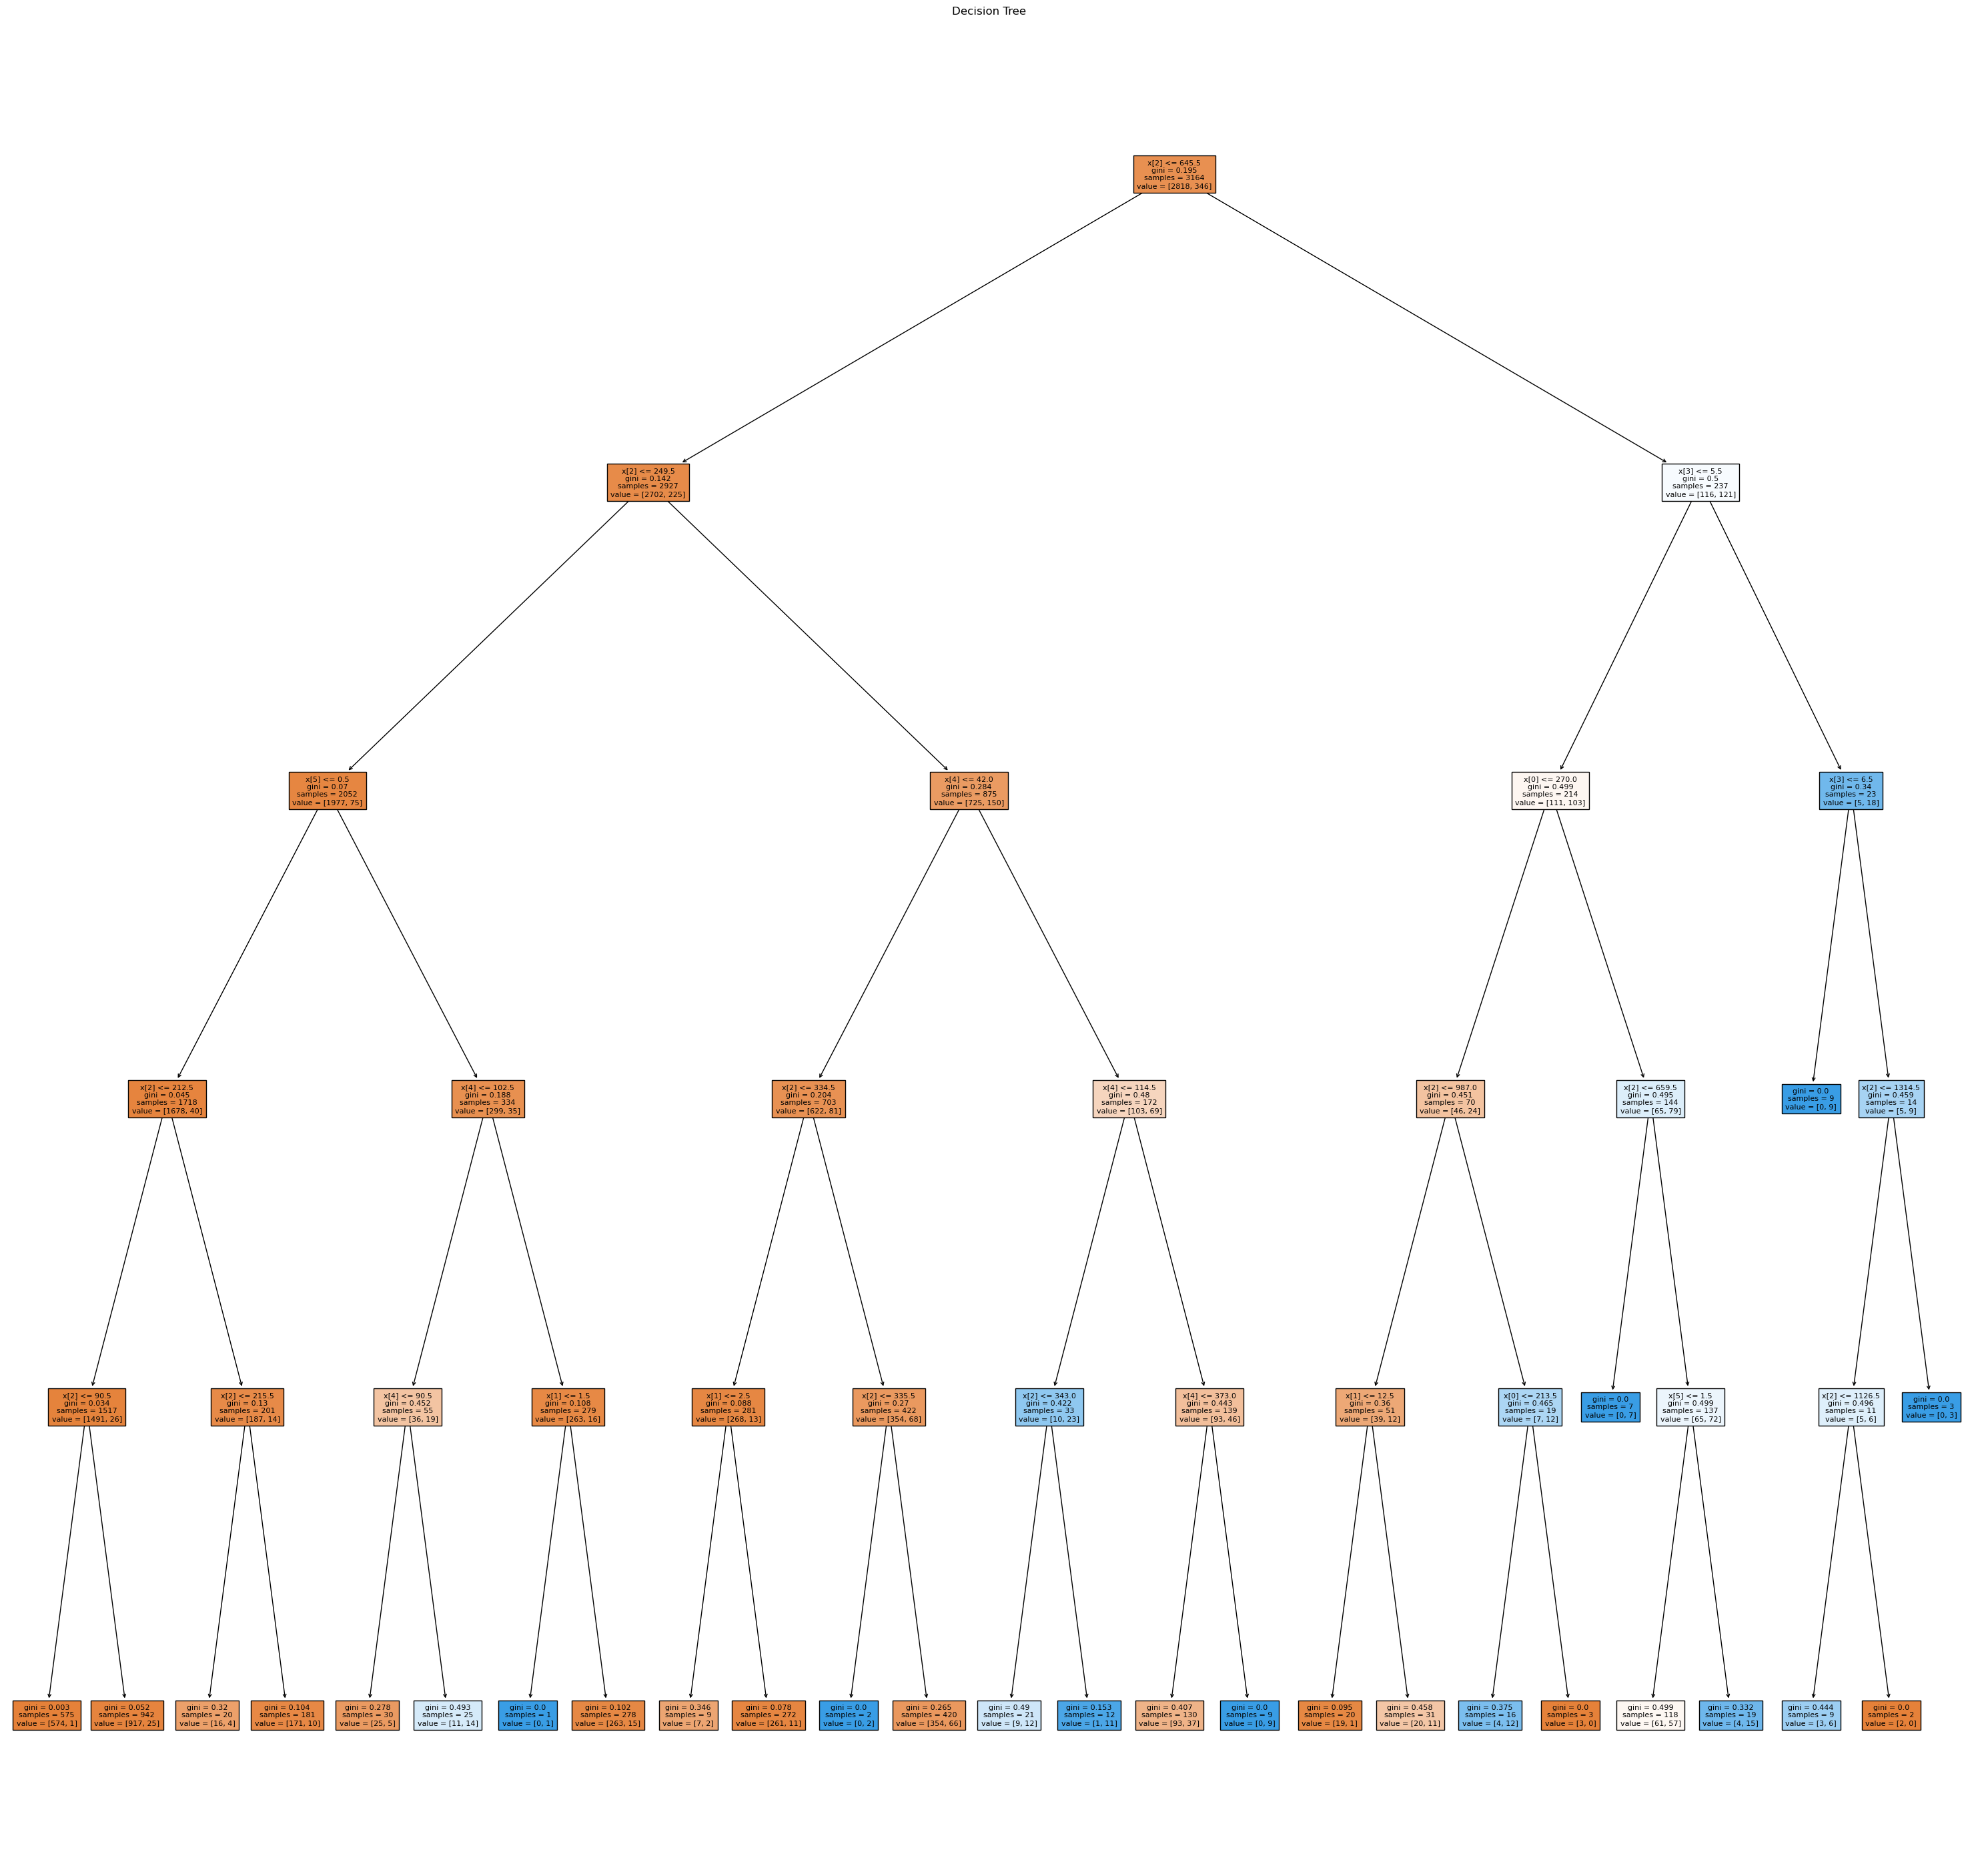

In [34]:
# Rewrite to account for one hot encoded data.
# Takes time to run
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation\
from sklearn import tree
from sklearn.tree import plot_tree

#split dataset in features and target variable
feature_cols = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X = data[feature_cols] # Features
y = data.y # Target variable

# Split dataset into training set and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred = clf.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred))

plt.figure(figsize=(38, 36))
plot_tree(clf, filled=True, fontsize=8)
plt.title("Decision Tree")
plt.show()

## XGBoost

In [35]:
# from sklearn.preprocessing import OrdinalEncoder
# import seaborn as sns

# import pandas as pd

# import numpy as np

# import matplotlib.pyplot as plt

# import warnings

# import xgboost as xgb


# warnings.filterwarnings("ignore")


# diamonds = sns.load_dataset("diamonds")

# X, y = diamonds.drop("cut", axis=1), diamonds[['cut']]

# # Encode y to numeric
# y_encoded = OrdinalEncoder().fit_transform(y)

# # Extract text features
# cats = X.select_dtypes(exclude=np.number).columns.tolist()

# # Convert to pd.Categorical
# for col in cats:
#    X[col] = X[col].astype('category')

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1, stratify=y_encoded)

# # Create classification matrices
# dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
# dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# params = {"objective": "multi:softprob", "tree_method": "gpu_hist", "num_class": 5}
# n = 1000

# results = xgb.cv(
#    params, dtrain_clf,
#    num_boost_round=n,
#    nfold=5,
#    metrics=["mlogloss", "auc", "merror"],
# )

# results.keys()

# Index(['train-mlogloss-mean', 'train-mlogloss-std', 'train-auc-mean',

#       'train-auc-std', 'train-merror-mean', 'train-merror-std',

#       'test-mlogloss-mean', 'test-mlogloss-std', 'test-auc-mean',

#       'test-auc-std', 'test-merror-mean', 'test-merror-std'],

#      dtype='object')

# results['test-auc-mean'].max()

# # Train a model using the scikit-learn API
# xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
# xgb_classifier.fit(X_train, y_train)

# # Convert the model to a native API model
# model = xgb_classifier.get_booster()
# print(model)

In [36]:
# import xgboost as xgb
# from sklearn.preprocessing import OrdinalEncoder

# # Encode y to numeric
# y_encoded = OrdinalEncoder().fit_transform(y_train)


# # Train a model using the scikit-learn API
# xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
# xgb_classifier.fit(X_train, y_train)

# # Convert the model to a native API model
# model = xgb_classifier.get_booster()
# print(model)

## SVM

In [37]:
#Freezes on loading of dummy data

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

# fit the model, don't regularize for illustration purposes
# enc = preprocessing.OrdinalEncoder()
# enc.fit_transform(data['job'].values.reshape(-1,1))
# clf = svm.SVC(kernel="linear", gamma='auto')
# clf.fit(X_test, y_test)

# plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# # plot the decision function
# ax = plt.gca()
# DecisionBoundaryDisplay.from_estimator(
#     clf,
#     X,
#     plot_method="contour",
#     colors="k",
#     levels=[-1, 0, 1],
#     alpha=0.5,
#     linestyles=["--", "-", "--"],
#     ax=ax,
# )
# # plot support vectors
# ax.scatter(
#     clf.support_vectors_[:, 0],
#     clf.support_vectors_[:, 1],
#     s=100,
#     linewidth=1,
#     facecolors="none",
#     edgecolors="k",
# )
# plt.show()

# Model-Performance & Improvements

One thing to consider with improving the model is does dropping the outliers improve efficency.

Optional k-fold split on 7 splits

In [38]:
# # To help with model building
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import (
#     AdaBoostClassifier,
#     GradientBoostingClassifier,
#     RandomForestClassifier,
#     BaggingClassifier,
# )
# from xgboost import XGBClassifier

# # def do_model_cv_and_scoring(X_train, y_train, scoring="recall"):
#     models = []  # Empty list to store all the models

#     # Appending models into the list
#     models.append(("Bagging", BaggingClassifier(random_state=1, n_jobs=-1)))
#     models.append(("Random forest", RandomForestClassifier(random_state=1, n_jobs=-1)))
#     models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
#     models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
#     models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss", n_jobs=-1)))
#     models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))

#     results = []  # Empty list to store all model's CV scores
#     names = []  # Empty list to store name of the models
#     score = []
    
#     # loop through all models to get the mean cross validated score
#     print("\n" "Cross-Validation Performance ({}):" "\n".format(scoring))
#     for name, model in models:
#         kfold = StratifiedKFold(
#             n_splits=7, shuffle=True, random_state=1
#         )  # Setting number of splits equal to 7
#         cv_result = cross_val_score(
#             estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
#         )
#         results.append(cv_result)
#         names.append(name)
#         print("{}: {:.2%}".format(name, cv_result.mean()))

#     print("\n" "Validation Performance ({}):" "\n".format(scoring))

#     for name, model in models:
#         model.fit(X_train, y_train)
#         prediction=model.predict(X_val)
#         if (scoring=="recall"):
#             scores = recall_score(y_val, prediction)
#         elif(scoring=="precision"):
#             scores = precision_score(y_val, prediction)
#         else:
#             scores = accuracy_score(y_val, prediction)
#         score.append(scores)
#         print("{}: {:.2%}".format(name, scores))
        
#     return results

# results=do_model_cv_and_scoring(X_train, y_train)

# Conclusion

### Conclusions